In [1]:
!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

# The dataset contains information about possums.

## Our objective is to be able to find a relationship between the possums body size/ head size and it's age



In [6]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Load the data and print the head
train_df = pd.read_csv('train.csv')
print(train_df.head())

   case  site    Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0    39     2    Vic   f  1.0     84.7    51.5      75.0   34.0      68.7   
1    32     1    Vic   f  4.0     94.3    56.7      94.0   39.0      74.8   
2    85     6  other   m  3.0     89.5    56.2      92.0   40.5      65.6   
3     4     1    Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4    66     5  other   f  3.0     90.4    55.8      86.0   36.5      63.2   

   earconch   eye  chest  belly  
0      53.4  13.0   25.0   25.0  
1      52.0  14.9   28.0   34.0  
2      43.5  14.5   27.0   31.5  
3      52.2  15.2   28.0   34.0  
4      44.2  15.7   26.5   34.0  


# Before we go any further, we need to figure out if our data has any unexpected values. Most of the time, we might encounter empty or null data points. These are interpreted as NaN values

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      73 non-null     int64  
 1   site      73 non-null     int64  
 2   Pop       73 non-null     object 
 3   sex       73 non-null     object 
 4   age       72 non-null     float64
 5   hdlngth   73 non-null     float64
 6   skullw    73 non-null     float64
 7   totlngth  73 non-null     float64
 8   taill     73 non-null     float64
 9   footlgth  72 non-null     float64
 10  earconch  73 non-null     float64
 11  eye       73 non-null     float64
 12  chest     73 non-null     float64
 13  belly     73 non-null     float64
dtypes: float64(10), int64(2), object(2)
memory usage: 8.1+ KB


### We see we have 72 age values, 73 hdlngth values and 73 totlngth values, which means one row doesn't have any age information. There are many ways to handle this kind of dirty data. For now we will just drop the rows with NaN values

In [11]:
train_df = train_df.dropna()

## Once we print the head, we will see we have a column called age, hdlngth and totlngth. These three should be the age, head length and total length of the possums

In [12]:
# Let's also load the test data and do the same exercise to ensure you don't have NaN data points
test_df = pd.read_csv('test.csv')
test_df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,6,1,Vic,f,1.0,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0
1,8,1,Vic,f,6.0,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
2,13,1,Vic,m,5.0,95.1,59.9,89.5,36.0,71.0,49.8,15.8,27.0,32.0
3,15,1,Vic,m,5.0,92.9,57.6,85.5,34.0,69.7,51.8,15.7,28.0,35.0
4,20,1,Vic,f,4.0,94.8,56.3,89.0,38.0,73.8,52.4,15.5,27.0,36.0


In [13]:
test_df = test_df.dropna()

In [14]:
# let us isolate those features
train_df = train_df[['age', 'hdlngth', 'totlngth']]
print(train_df.head())


   age  hdlngth  totlngth
0  1.0     84.7      75.0
1  4.0     94.3      94.0
2  3.0     89.5      92.0
3  6.0     93.2      92.0
4  3.0     90.4      86.0


In [15]:
# let us isolate those features
test_df = test_df[['age', 'hdlngth', 'totlngth']]
print(test_df.head())

   age  hdlngth  totlngth
0  1.0     93.1      90.5
1  6.0     94.8      91.0
2  5.0     95.1      89.5
3  5.0     92.9      85.5
4  4.0     94.8      89.0


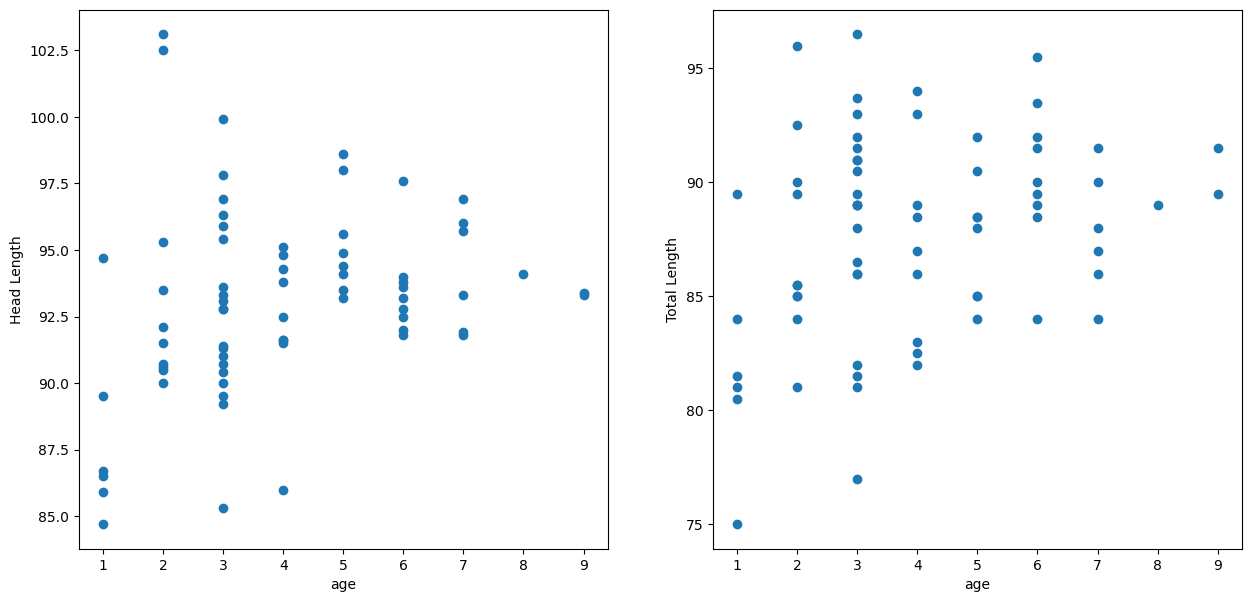

In [16]:
# we will now visualise the columns using scatterplots. We need to identify if there exists any patterns we can utilise.

# let us set a landscape figure of size 15cm x 7cm
plt.figure(figsize=(15, 7))
# we will also create subplots so that the data is split in it's own window
ax1 = plt.subplot(1, 2, 1)     # subplot function takes three values, total number of rows, total number of columns and the position of your plot in that grid
plt.scatter(train_df.age, train_df.hdlngth)
ax1.set_xlabel('age')
ax1.set_ylabel('Head Length')

# let's create the second subplot
ax2 = plt.subplot(1, 2, 2)     # notice the position of next plot is 2 in out 1x2 grid
plt.scatter(train_df['age'], train_df['totlngth'])
ax2.set_xlabel('age')
ax2.set_ylabel('Total Length')

plt.show()

It seems like the age and the lengths are positively correlated; which is expected

### But let's try to predict the age given the total length and the head length of a possum


In [17]:
# import machine learning library
from sklearn.linear_model import LinearRegression

### Machine learning is a tool which can learn from the input and output of our data. In our case, we want to predict the age (known as y or target) from the head and total length (known as x or features)
[ ]


In [18]:
# let's separate the features and target
train_x = train_df[['hdlngth', 'totlngth']]
train_y = train_df['age']

In [19]:
# let's separate the features and target
test_x = test_df[['hdlngth', 'totlngth']]
test_y = test_df['age']

## Now to train a regression model. But before we do that, we need to ask, why did we choose a regression model?

### Regression models are chosen for targets which are continuous in nature. In our case, although age is not continuous in nature, the spread (variance) of the data is huge, so it might make sense that our model doesn't predict exact age but a real number, which we can then use as we like


In [20]:
# create a model instance

linear_model = LinearRegression()

# train a model (also called fitting the data)
linear_model.fit(train_x, train_y)

LinearRegression()

### Let make some predictions

In [21]:
# if you've split your test data correctly the following should work

predictions = linear_model.predict(test_x)

### Let's plot the predictions and the actual data

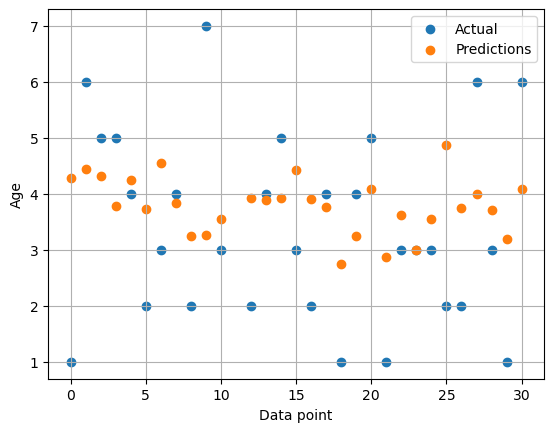

In [22]:
plt.scatter(test_x.index, test_y, label='Actual')
plt.scatter(test_x.index, predictions, label='Predictions')
plt.xlabel('Data point')
plt.ylabel('Age')
plt.legend()
plt.grid()
plt.show()

In [23]:
# let's also quantify our predictions with a number

print(np.mean(np.square(predictions - test_y)))

2.66857378809586
